# Fitting Stuff

We have already seen examples of both linear and non-linear regression fits to data.  In most (maybe all?) experiments though, we often have uncertainties associated with each data point.  We should understand more about how this affects the fitting procedure.

The linear/non-linear regression examples that we have studied thus far use a method called "Ordinary Least Squares".  The basic theory behind this is:

$\chi^2 = \sum_i^N (y_i - y_{fit}(x_i))^2$

where $y_{fit} = f(a,b,c,...)$ is the fitting function.  The idea is that we must solve the set of equations defined by:

$\frac{\partial \chi^2}{\partial a} = 0, \frac{\partial \chi^2}{\partial b} = 0, \frac{\partial \chi^2}{\partial c} = 0, ...$

In the case of polynomial fitting functions (or any order), the values of the polynomial coefficients are uniquely defined.  That is, there is a single global minimum in the $\chi^2$ function.  For other non-linear fitting functions, there may be local minima in the $\chi^2$ function, and this requires that we provide initial starting values for the parameters of the fitting function that are close to the global minimum.

When we have uncertainties for each of the $N$ data points, the definition of $\chi^2$ becomes:

$\chi^2 = \sum_i^N \left (\frac{y_i - y_{fit}(x_i)}{\sigma_i}\right)^2$

### Let us now investigate how uncertainties affect both (a) the fit parameters and (b) the confidence interval on the fit.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
# create some fake data

npts = 11
xlow = 5.4
xhigh = 5.5

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom

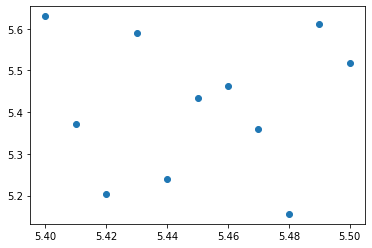

In [ ]:
plt.plot(xi,yi,'o')

## Case 1:  Linear Fit with No Uncertainties

Coefficients (from curve_fit)
[5.26942627 0.02691376]
Covariance Matrix (from curve_fit)
[[ 83.1557647  -15.25742413]
 [-15.25742413   2.79952724]]

Final Result: y = (0.03 +/- 1.67) x + (5.27 +/- 9.12)


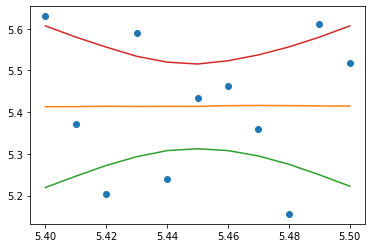

In [ ]:
from scipy.optimize import curve_fit

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.plot(xi,yi,'o')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('None')

## Case 2:  Linear Fit with Uniform Uncertainties

<ErrorbarContainer object of 3 artists>

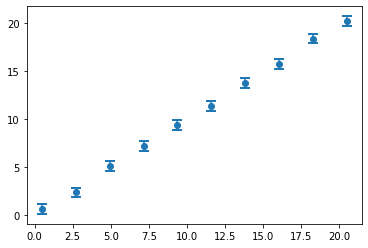

In [ ]:
sigmai = np.array([0.5 for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

Coefficients (from curve_fit)
[0.03643892 0.9631608 ]
Covariance Matrix (from curve_fit)
[[ 0.01961791 -0.00509719]
 [-0.00509719  0.00169906]]

Final Result: y = (0.96 +/- 0.04) x + (0.04 +/- 0.14)


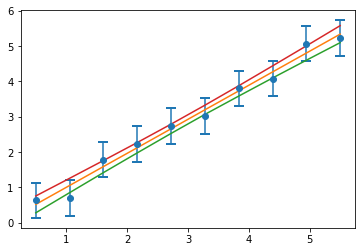

In [ ]:
init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals,sigma=sigmai)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Uniform')

## Case 3:  Linear Fit with Increasing Uncertainties

<ErrorbarContainer object of 3 artists>

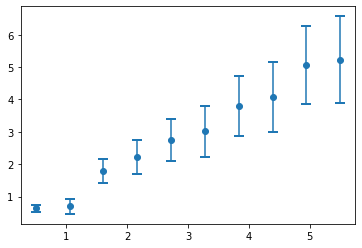

In [ ]:
sigmai = np.array([0.1 + 0.25*(xi[i]-xl) for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

Coefficients (from curve_fit)
[0.13136348 0.91523563]
Covariance Matrix (from curve_fit)
[[ 0.00664906 -0.00423978]
 [-0.00423978  0.00509819]]

Final Result: y = (0.92 +/- 0.07) x + (0.13 +/- 0.08)


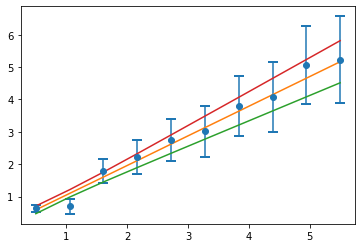

In [ ]:
init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals,sigma=sigmai)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Increasing')

## Case 4:  Linear Fit with Increasing Uncertainties at Endpoints

<ErrorbarContainer object of 3 artists>

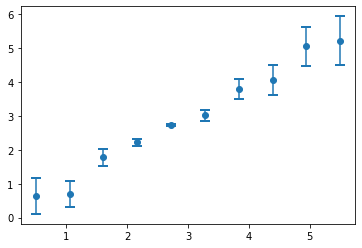

In [ ]:
sigmai = np.array([0.1+ 0.25*(xi[i]-xmid) for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

Coefficients (from curve_fit)
[0.21862545 0.92261509]
Covariance Matrix (from curve_fit)
[[ 0.02553568 -0.00932121]
 [-0.00932121  0.00345061]]

Final Result: y = (0.92 +/- 0.06) x + (0.22 +/- 0.16)


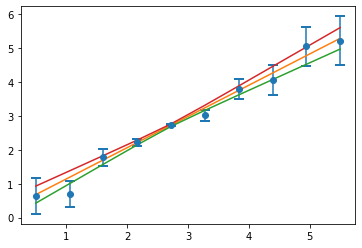

In [ ]:
init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals,sigma=sigmai)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Endpoints')

## Preliminary Conclusions

1. If the uncertainties are uniform, there is no impact on the uncertainties in the fit parameters, the uncertainties in the fit parameters, or the confidence bands.  This can be understood mathematically by considering the dependence of $\chi^2$ on $\sigma_i$; if all $\sigma_i$ are the same, then there is no dependence of the derivatives of $\chi^2$ on $\sigma_i$.

2. If the uncertainties are non-uniform, the resulting fit parameters and confidence bands will depend upon the $\sigma_i$ in a complicated way!



In [ ]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,None,0.963161,0.041220,0.036439,0.140064
1,Uniform,0.963161,0.041220,0.036439,0.140064
2,Increasing,0.915236,0.071402,0.131363,0.081542
3,Endpoints,0.922615,0.058742,0.218625,0.159799


## Case 5:  Determining the Y-intercept with increasing uncertainties at small x

In many experiments, the uncertainties increase as the independent variable ($x$) becomes small.  We seek to understand how best to design our experiment in these situations to optimize the determination of the y-intercept (at $x=0$).

<ErrorbarContainer object of 3 artists>

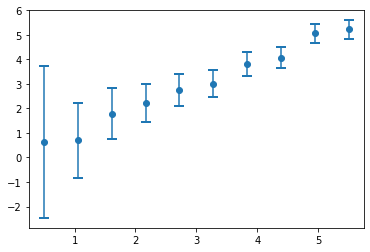

In [ ]:
sigmai = np.array([0.1+ 1.5/np.abs(xi[i]) for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

Coefficients (from curve_fit)
[0.05890002 0.95763845]
Covariance Matrix (from curve_fit)
[[ 0.0514637  -0.01140739]
 [-0.01140739  0.00272621]]

Final Result: y = (0.96 +/- 0.05) x + (0.06 +/- 0.23)


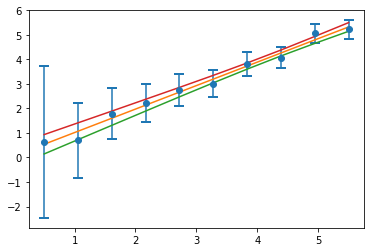

In [ ]:
init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals,sigma=sigmai)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Increasing at Small X')

## Preliminary Conclusion:  our knowledge of the y-intercept is very limited!

In [ ]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,None,0.963161,0.041220,0.036439,0.140064
1,Uniform,0.963161,0.041220,0.036439,0.140064
2,Increasing,0.915236,0.071402,0.131363,0.081542
3,Endpoints,0.922615,0.058742,0.218625,0.159799
4,Increasing at Small X,0.957638,0.052213,0.058900,0.226856


## Case 6:   Decrease the range of x - Focus on the small x region

What is the impact of taking the same amount of data as in the original experiment, but focusing on the small x region?

<ErrorbarContainer object of 3 artists>

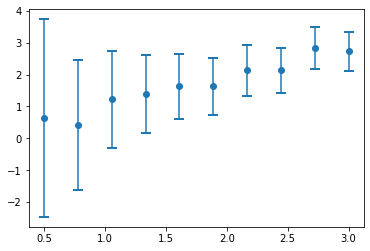

In [ ]:
# create some fake data

npts = 10
xlow = 0.5
xhigh = 3.0

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yi = xi + yrandom

sigmai = np.array([0.1+ 1.5/np.abs(xi[i]) for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

Coefficients (from curve_fit)
[0.07486201 0.91734821]
Covariance Matrix (from curve_fit)
[[ 0.05664834 -0.0228972 ]
 [-0.0228972   0.00991673]]

Final Result: y = (0.92 +/- 0.10) x + (0.07 +/- 0.24)


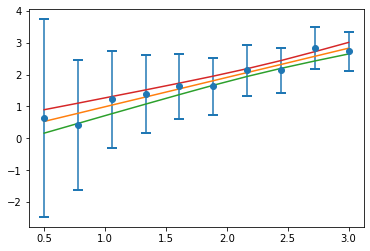

In [ ]:
init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals,sigma=sigmai)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Small X Range')

In [ ]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head(10)

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,None,0.963161,0.041220,0.036439,0.140064
1,Uniform,0.963161,0.041220,0.036439,0.140064
2,Increasing,0.915236,0.071402,0.131363,0.081542
3,Endpoints,0.922615,0.058742,0.218625,0.159799
4,Increasing at Small X,0.957638,0.052213,0.058900,0.226856
5,Small X Range,0.917348,0.099583,0.074862,0.238009


## Case 7:   Increase the range of x - create a larger lever arm

What is the impact of taking the same amount of data as in the original experiment, but increasing the x range, so as to creat a larger lever arm?

In [ ]:
# create some fake data

npts = 10
xlow = 0.5
xhigh = 20.5

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yi = xi + yrandom

sigmai = np.array([0.1+ 1.5/np.abs(xi[i]) for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

ValueError: ignored

In [ ]:
init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals,sigma=sigmai)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Large X Range')

ValueError: ignored

In [ ]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head(10)

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,None,1.004596,0.024597,0.08926,0.116413


Notes:
Changing the x-value to 10: I changed the npts. to 10 and kept the range the same. As far as seeing the differences it is somewhat difficult depending on what I was looking at. When comparing the data that was outputed for me with the intial data that was provided, I could see a slight difference. When comparing the coefficients graphs I could see a noticble difference. Also, with the data fit tables I could see a noticble difference.


When I increased the x-value to 14, 15, 17 there was a much more noticable difference. When I lowered the x-value to 6 the differences compared to the original data were more noticable. 

When I changed the low to 0 and the high to 8 the coefficient fits matched the data better. I kept the x-value at 11 and changed the lower range to 5.4 so it was just under 5.5 I recieved data that wasn't that useful. There weren't as many data points.

Conclusion: Having more data points and a wide range will give a better result when anaylizing data.
 